In [1]:
#Importamos las librerías y el csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder

import folium
import plotly.express as px

df_products = pd.read_csv("products_df.csv")


In [3]:
#Primeras observaciones

In [4]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
dtypes: float64(2), int64(15), object(1)
memory usage: 818.9+ MB


In [5]:
df_products.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [6]:
df_products.head(10)

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
5,5,1050615,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
6,6,1050616,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
7,7,1050617,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
8,8,1050619,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
9,9,1050620,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [7]:
df_products.isnull().sum()

Unnamed: 0             0
pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [8]:
df_products["credit_card"].value_counts()

credit_card
0    5892058
1      70866
Name: count, dtype: int64

In [9]:
#Parece que el dataframe es un dataframe binario, tiene la info de cada cliente, 
# y te da información con 0 y 1 si tiene o no ese producto. 

In [10]:
#Pasamos la columna fecha a formato fecha

In [11]:
for i in ["pk_partition"]:
    df_products[i]=pd.to_datetime(df_products[i])

In [12]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   short_term_deposit  int64         
 4   loans               int64         
 5   mortgage            int64         
 6   funds               int64         
 7   securities          int64         
 8   long_term_deposit   int64         
 9   em_account_pp       int64         
 10  credit_card         int64         
 11  payroll             float64       
 12  pension_plan        float64       
 13  payroll_account     int64         
 14  emc_account         int64         
 15  debit_card          int64         
 16  em_account_p        int64         
 17  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(15)
memory usage: 818.9 MB


In [13]:
#Comprobamos si hay duplicados

In [14]:
df_products[df_products.duplicated()].info() 

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          0 non-null      int64         
 1   pk_cid              0 non-null      int64         
 2   pk_partition        0 non-null      datetime64[ns]
 3   short_term_deposit  0 non-null      int64         
 4   loans               0 non-null      int64         
 5   mortgage            0 non-null      int64         
 6   funds               0 non-null      int64         
 7   securities          0 non-null      int64         
 8   long_term_deposit   0 non-null      int64         
 9   em_account_pp       0 non-null      int64         
 10  credit_card         0 non-null      int64         
 11  payroll             0 non-null      float64       
 12  pension_plan        0 non-null      float64       
 13  payroll_account     0 non-null      int64         
 14  emc_account

In [15]:
#Pasamos al tratamiento de los nulos

In [16]:
df_products.isnull().sum()

Unnamed: 0             0
pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [17]:
#Tratamos la variable payroll

In [18]:
df_products["payroll"].value_counts()

payroll
0.0    5757076
1.0     205787
Name: count, dtype: int64

In [19]:
#Consideramos sustituir los valores nulos por un outlier, en este caso el valor 99

In [20]:
df_products.loc[df_products["payroll"].isnull(), 'payroll'] = 999

In [21]:
df_products.isnull().sum()

Unnamed: 0             0
pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll                0
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [22]:
#Analizamos la variable pension_plan

<Axes: >

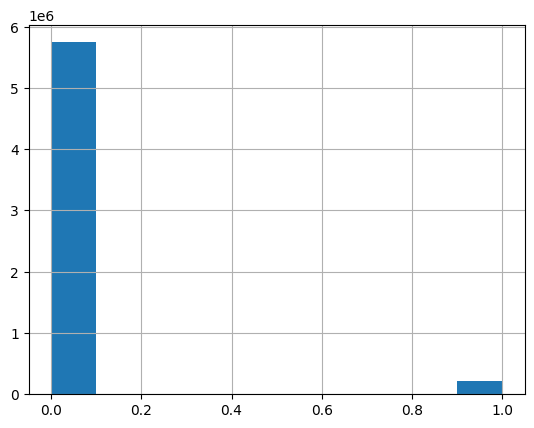

In [23]:
df_products["pension_plan"].hist()

In [24]:
#Hacemos lo mismo, sustituimos los nulos por un outlier

In [25]:
df_products.loc[df_products["pension_plan"].isnull(), 'pension_plan'] = 999

In [26]:
df_products.isnull().sum()

Unnamed: 0            0
pk_cid                0
pk_partition          0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

In [27]:
#Eliminamos las columnas que sean identificativas, en este caso el indice y el id del usuario

In [28]:
df_products2 = df_products.copy()

In [29]:
del(df_products2["Unnamed: 0"])

In [30]:
del(df_products2["pk_cid"])

In [33]:
n_index = 'Index'
df_products2 = df_products2.rename_axis(n_index).reset_index()

In [34]:
df_products2.set_index('Index', inplace=True)

In [35]:
df_products2

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
Index,,,,,,,,,,,,,,,,
0,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,2019-05-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
5962920,2019-05-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
5962921,2019-05-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
#Analizamos cada una de las variables

[[<Axes: title={'center': 'short_term_deposit'}>]]
[[<Axes: title={'center': 'loans'}>]]
[[<Axes: title={'center': 'mortgage'}>]]
[[<Axes: title={'center': 'funds'}>]]
[[<Axes: title={'center': 'securities'}>]]
[[<Axes: title={'center': 'long_term_deposit'}>]]
[[<Axes: title={'center': 'em_account_pp'}>]]
[[<Axes: title={'center': 'credit_card'}>]]
[[<Axes: title={'center': 'payroll'}>]]
[[<Axes: title={'center': 'pension_plan'}>]]
[[<Axes: title={'center': 'payroll_account'}>]]
[[<Axes: title={'center': 'emc_account'}>]]
[[<Axes: title={'center': 'debit_card'}>]]
[[<Axes: title={'center': 'em_account_p'}>]]
[[<Axes: title={'center': 'em_acount'}>]]


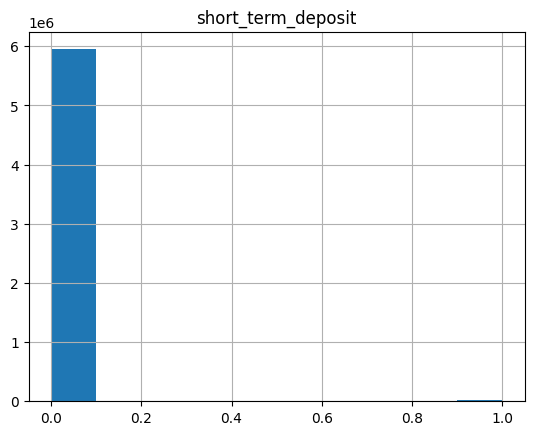

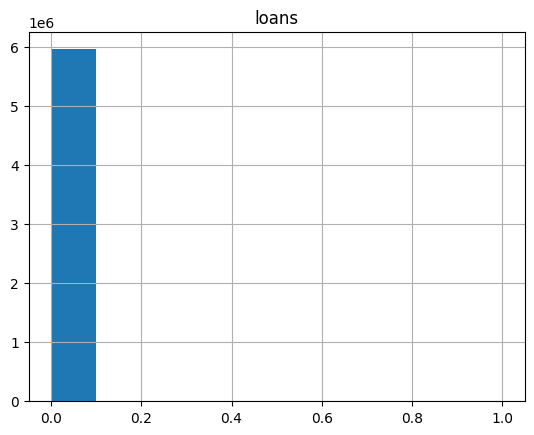

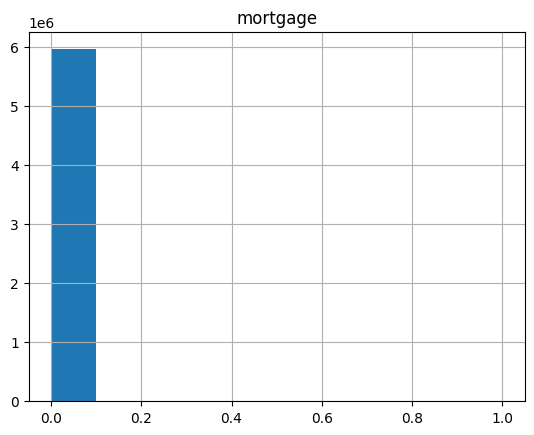

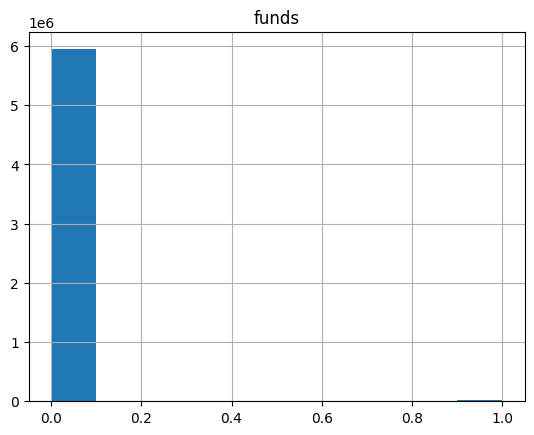

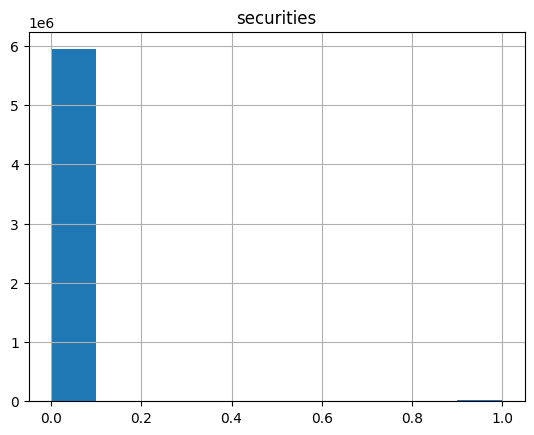

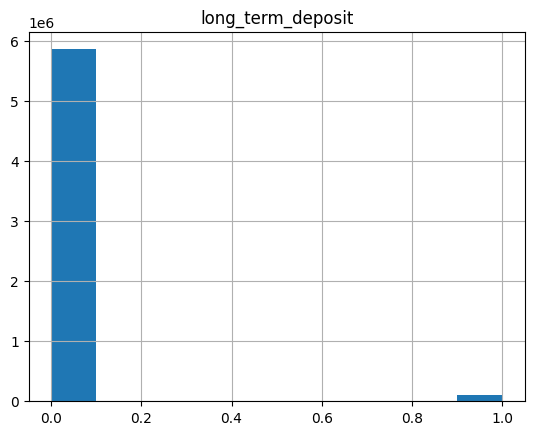

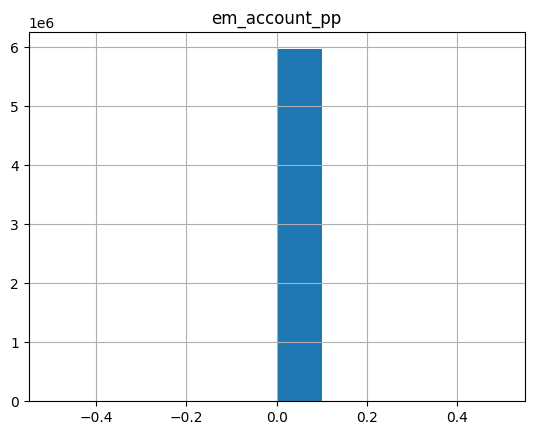

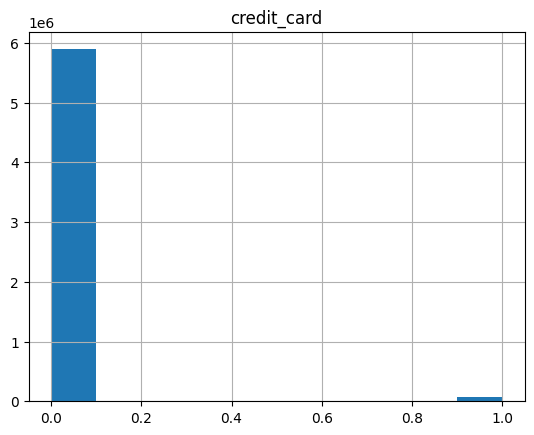

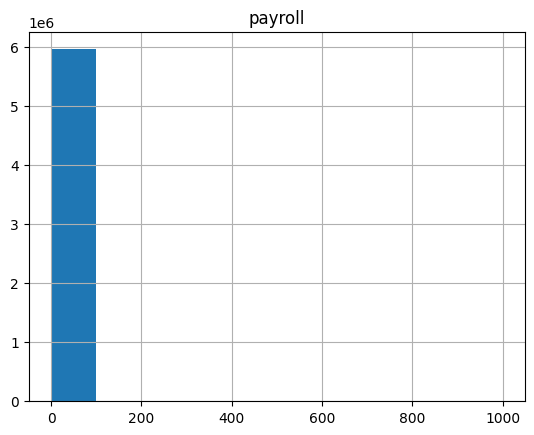

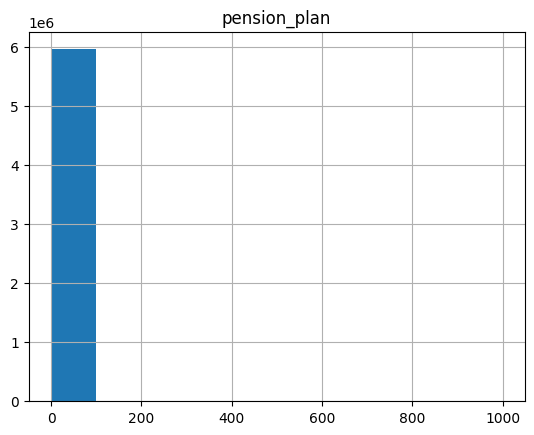

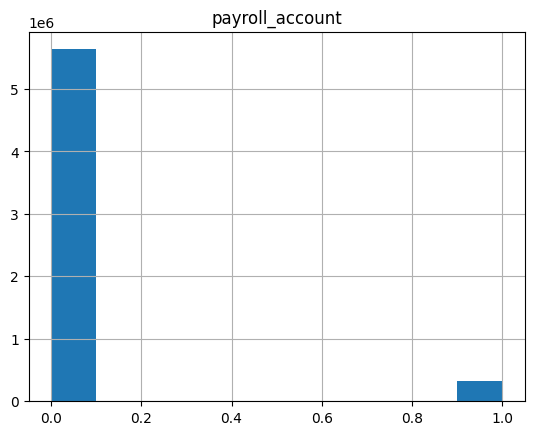

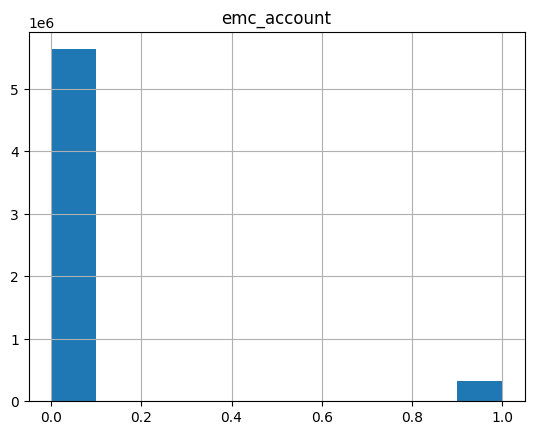

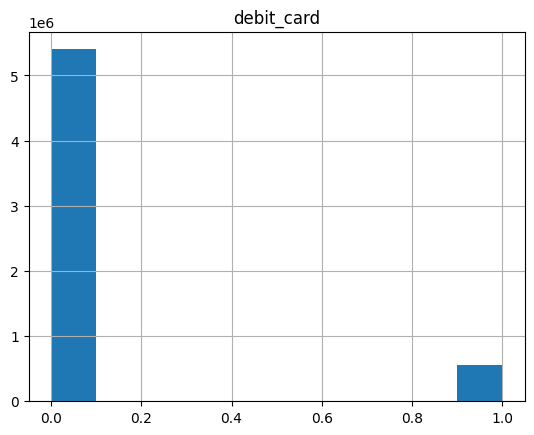

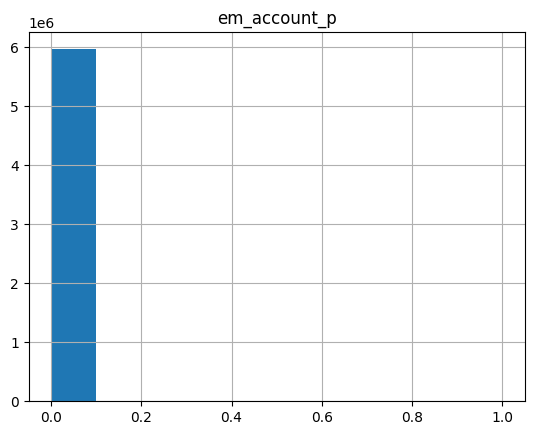

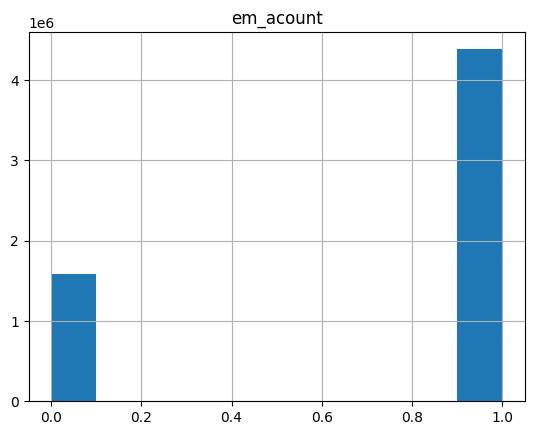

In [ ]:
for i in df_products2:
  if df_products2[i].dtype.kind == "O":
    print(i,'\n', df_products2[i].value_counts(), '\n')
  elif (df_products2[i].dtype.kind=="f") or (df_products2[i].dtype.kind=="i"):
    print(df_products2.hist(i))